In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score

In [4]:
#irisデータのロード
iris = load_iris()

In [52]:
#1.dataframeに変換する
feature_name = ["sepal_length","sepal_width","petal_length","petal width"]
df_creation_myself = pd.DataFrame(iris.data, columns=feature_name)
df_creation_myself["target"] = iris.target
df_creation_myself.head()

,sepal_length,sepal_width,petal_length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
#2.iris dataのcsvを直に読み込む
columns = ["sepal_length","sepal_width","petal_length","petal width", "target"]
df_from_csv = pd.read_csv(iris.filename, names=columns).drop(0)
df_from_csv.head()

/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv


,sepal_length,sepal_width,petal_length,petal width,target
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [89]:
df_origin = df_from_csv

#データの分割
(train_X, test_X, train_y, test_y) = train_test_split(
    df_origin.drop("target", axis=1), df_origin.target, test_size = 0.3, random_state = 0
)

#学習
clf = DecisionTreeClassifier(random_state=0).fit(train_X, train_y)

#予測
pred = clf.predict(test_X)

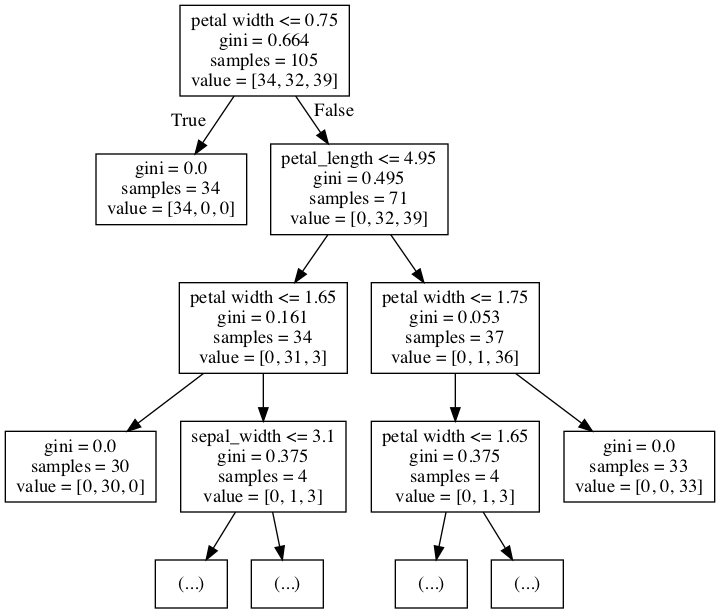

In [92]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())